# Topic 1. Introduction to Machine learning
## Advanced Supervised Classification Methods and ML Pipelines 


In this lab we will exercise different aspects related to the solution of supervised classification problem, including:

1- Identification of tasks

2- Application of pre-processing techniques using sklearn

3- Application of supervised machine learning algorithms using sklearn

4- Definition and use of pipelines



### We import the required libraries and some databases

In [1]:
# General python libraries
import numpy as np
import math
from matplotlib import pyplot as plt
import pandas as pd
from sklearn import tree
from io import StringIO
import copy

# sklearn functions
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import recall_score, confusion_matrix
from sklearn import metrics
from sklearn import preprocessing
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

# Databases
import sklearn.datasets as data_load

# TPOT Library for pipeline optimization
from tpot import TPOTClassifier

/usr/local/lib/python3.5/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


### Sklearn contains the "wine" dataset which defines a multi-class classification task  

Execute the following cell to load the dataset and print a description of it 

In [2]:
# The dataset is loaded
wine_data = data_load.load_wine()
print(wine_data["DESCR"])


.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

# Exercise 1:  Wine type classification


1.1) Divide the dataset into two sets (wine_train_data and wine_test_data)  of similar size (respectively, wine_train_class and wine_test_class)

1.2) Learn a random forest classifier with 100 trees (maximum depth of the trees 10) using the wine_train_data,wine_train_class datasets

1.3) Knowing that random_forest_clf.estimators_ is a list of all the decision trees in the random forest, and using the function tree.plot_tree(decision_tree) that visualize decision trees:

1.3.1) Visualize the decision trees 10 and 30 of the random forest

1.3.2) Interpret the meaning of the four values shown in each node of the tree

1.4) Predict the classes of the examples in the wine_test_data set

1.5) Compute the accuracy of the RF prediction 

1.6) Compute the confusion matrix


### Answer to 1.1)

In [3]:
# We use even indices for train data
wine_train_data = wine_data['data'][0::2]
wine_train_class = wine_data['target'][0::2]

# We use odd indices for test data
wine_test_data  = wine_data['data'][1::2]
wine_test_class = wine_data['target'][1::2]

### Answer to 1.2)

In [4]:
random_forest_clf = RandomForestClassifier(n_estimators=100, max_depth=10)
random_forest_clf.fit(wine_train_data,wine_train_class)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Answer to 1.3)

[Text(623.111,957.425,'X[12] <= 772.5\nentropy = 0.627\nsamples = 54\nvalue = [28, 43, 18]'),
 Text(311.556,683.875,'X[6] <= 1.005\nentropy = 0.414\nsamples = 33\nvalue = [0, 41, 17]'),
 Text(155.778,410.325,'entropy = 0.0\nsamples = 10\nvalue = [0, 0, 16]'),
 Text(467.333,410.325,'X[11] <= 1.485\nentropy = 0.046\nsamples = 23\nvalue = [0, 41, 1]'),
 Text(311.556,136.775,'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(623.111,136.775,'entropy = 0.0\nsamples = 22\nvalue = [0, 41, 0]'),
 Text(934.667,683.875,'X[7] <= 0.15\nentropy = 0.179\nsamples = 21\nvalue = [28, 2, 1]'),
 Text(778.889,410.325,'entropy = 0.0\nsamples = 1\nvalue = [0, 2, 0]'),
 Text(1090.44,410.325,'X[1] <= 2.305\nentropy = 0.067\nsamples = 20\nvalue = [28, 0, 1]'),
 Text(934.667,136.775,'entropy = 0.0\nsamples = 19\nvalue = [28, 0, 0]'),
 Text(1246.22,136.775,'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]')]

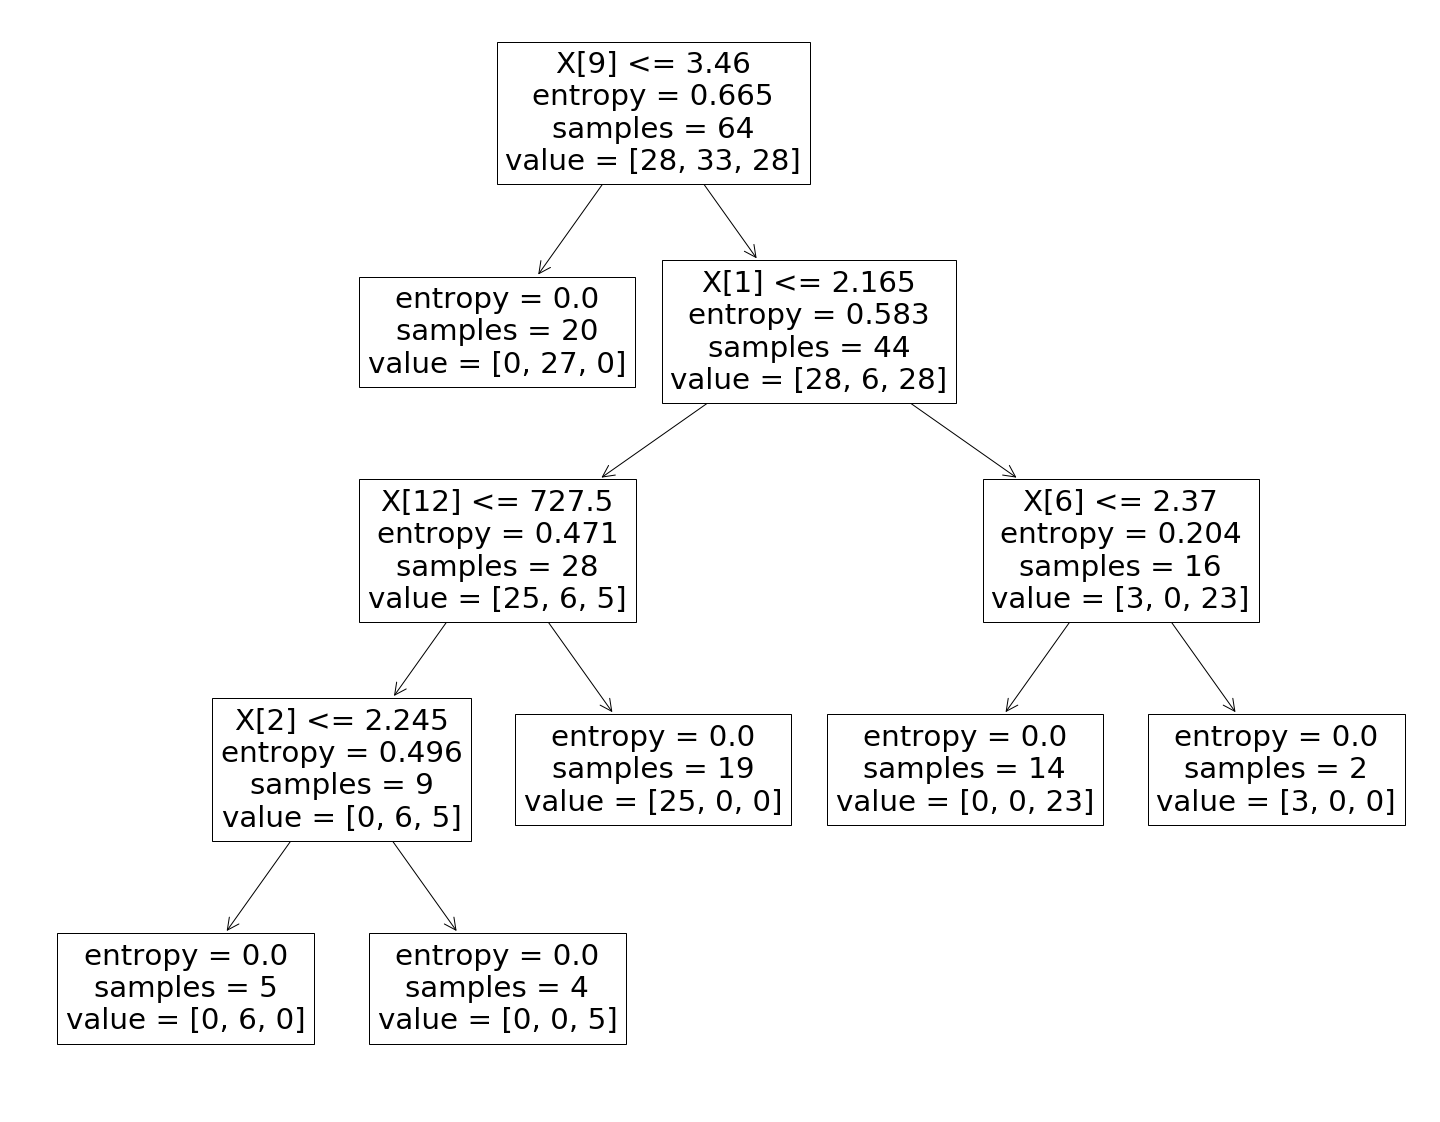

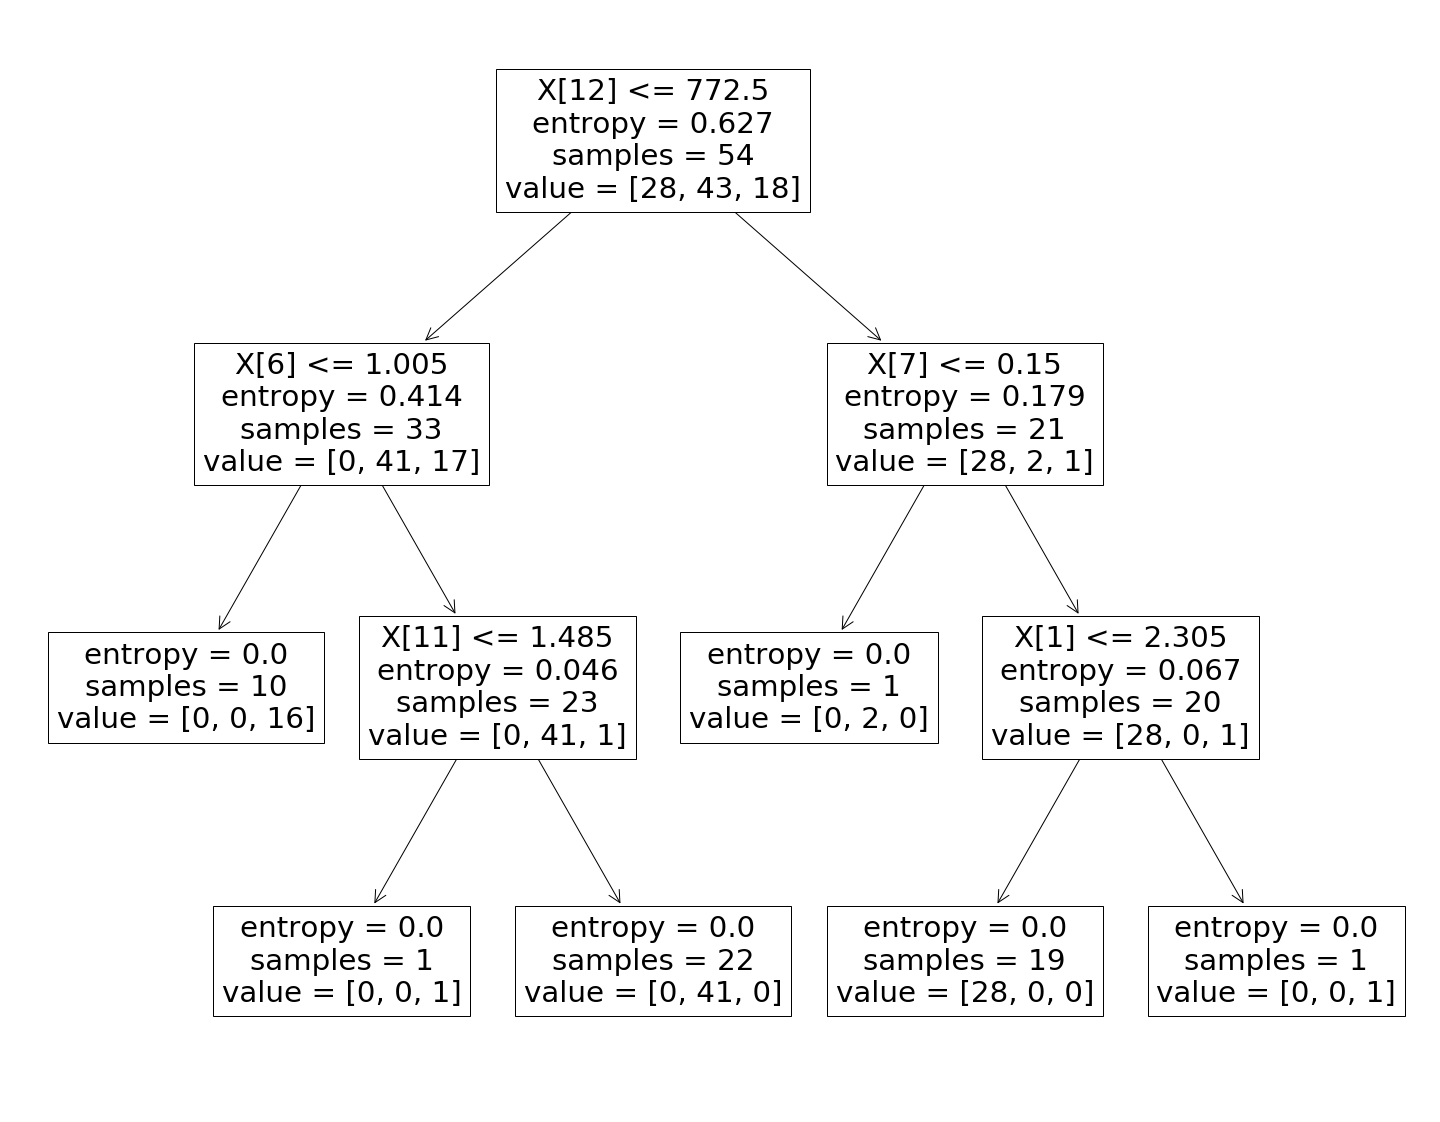

In [5]:
decision_tree_10 = random_forest_clf.estimators_[10]
fig = plt.figure(figsize=(25,20))
tree.plot_tree(decision_tree_10)


decision_tree_30 = random_forest_clf.estimators_[30]
fig = plt.figure(figsize=(25,20))
tree.plot_tree(decision_tree_30)



### Answer to 1.4)

In [6]:
test_prediction = random_forest_clf.predict(wine_test_data)

### Answer to 1.5)

In [7]:
test_accuracy = accuracy_score(wine_test_class,test_prediction)
print('The test accuracy obtained by the random forest is:',test_accuracy)

The test accuracy obtained by the random forest is: 0.9662921348314607


### Answer to 1.6)

In [8]:
test_conf_matrix = confusion_matrix(wine_test_class,test_prediction)
print('The confusion  matrix obtained by the random forest is:')
print(test_conf_matrix)

The confusion  matrix obtained by the random forest is:
[[29  0  0]
 [ 1 33  2]
 [ 0  0 24]]


# Exercise 2: Feature selection 


2.1) Use the feature importance function of random forests to compute the importance of each feature
as computed by the random forest learned in Exercise 1.2.

2.2) Learn a new random forest using only the 8 most informative features

Hint: You can use the function np.argsort() to sort the important features and identify the 8 most important

2.3) Predict the classes of the examples in the wine_test_data set using the new random forest


2.4) Compute the accuracy

2.5) Compute the confusion matrix




### Answer to 2.1)

In [9]:
importances = random_forest_clf.feature_importances_
print(importances)

[0.09530094 0.02656663 0.01385268 0.02210899 0.01351363 0.04892506
 0.182758   0.01812178 0.01833694 0.17835651 0.09925563 0.1013844
 0.1815188 ]


### Answer to 2.2)

In [10]:
sorted_features = np.argsort(-importances)
selected_features = sorted_features[:8]
print(selected_features)


red_random_forest_clf = RandomForestClassifier(n_estimators=100, max_depth=10)
red_random_forest_clf.fit(wine_train_data[:,selected_features],wine_train_class)

[ 6 12  9 11 10  0  5  1]


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Answer to 2.3)

In [11]:
red_test_prediction = red_random_forest_clf.predict(wine_test_data[:,selected_features])

### Answer to 2.4)

In [12]:
red_test_accuracy = accuracy_score(wine_test_class,red_test_prediction)
print('The test accuracy obtained by the random forest on the reduced set of features is:',red_test_accuracy)

The test accuracy obtained by the random forest on the reduced set of features is: 0.9662921348314607


### Answer to 2.5)

In [13]:
red_test_conf_matrix = confusion_matrix(wine_test_class,red_test_prediction)
print('The confusion  matrix obtained by the random forest is:')
print(red_test_conf_matrix)

The confusion  matrix obtained by the random forest is:
[[29  0  0]
 [ 1 33  2]
 [ 0  0 24]]


# Exercise 3:  Feature engineering 


3.1) Use the PCA dimensionality reduction method to transform the wine_train_data and wine_test_data sets to new datasets with only 3 (engineered) features

3.2) Learn a support vector machine (svm) using the new datasets

3.3) Predict the classes of the examples in the transformed wine_test_data set using the svm

3.4) Compute the accuracy and compared with the one obtained in the previous exercise

3.5) Compute the confusion matrix

### Answer to 3.1)

In [14]:
n_components = 3
pca = PCA(n_components)
pca.fit(wine_train_data)

dim3_wine_train_data = pca.transform(wine_train_data)
dim3_wine_test_data = pca.transform(wine_test_data)

### Answer to 3.2)

In [15]:
linear_svc = svm.SVC(kernel='linear')
linear_svc.fit(dim3_wine_train_data,wine_train_class)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### Answer to 3.3)


In [16]:
dim3_test_prediction = linear_svc.predict(dim3_wine_test_data)

### Answer to 3.4)

In [17]:
dim3_test_accuracy = accuracy_score(wine_test_class,dim3_test_prediction)
print('The test accuracy obtained by the svm  on the 3 engineered features is:',dim3_test_accuracy)

The test accuracy obtained by the svm  on the 3 engineered features is: 0.8202247191011236


### Answer to 3.5)

In [18]:
dim3_test_conf_matrix = confusion_matrix(wine_test_class,dim3_test_prediction)
print('The confusion  matrix obtained by the svm is:')
print(dim3_test_conf_matrix)

The confusion  matrix obtained by the svm is:
[[26  2  1]
 [ 1 28  7]
 [ 0  5 19]]


# Exercise 4: Amount of alcohol prediction

We define a different machine learning task using the same dataset. We would like to predict the amount of alcohol in the wine given the other attributes of the dataset and the class


4.1) Create new train and test datasets for the new task  (hint: you could create new four sets 
(wine_train_data1 and wine_test_data1)  and  (wine_train_target and wine_test_target) from the original four datasets that you had created in the first exercise.


4.2) Learn a linear regression model from the wine_train_data1,wine_train_target datasets.


4.3) Predict the amount of alcohol using the wine_test_data1


4.4) Plot the original alcohol values versus the predicted ones using matplotlib 


4.5) Compute the mean squared error of the prediction


### Answer to 4.1)

In [19]:
wine_train_data1 =  np.hstack((wine_train_data[:,1:],wine_train_class.reshape([-1,1])))
wine_test_data1 =  np.hstack((wine_test_data[:,1:],wine_test_class.reshape([-1,1])))

wine_train_target = wine_train_data[:,0]
wine_test_target = wine_test_data[:,0]

### Answer to 4.2)

In [20]:
lr_clf = LinearRegression()
lr_clf.fit(wine_train_data1, wine_train_target)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Answer to 4.3)

In [21]:
target_prediction = lr_clf.predict(wine_test_data1)

### Answer to 4.4)

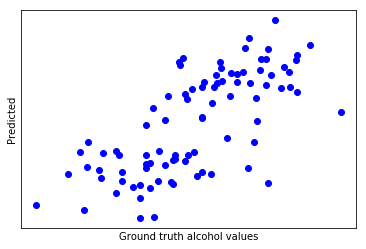

In [22]:
plt.plot(wine_test_target,target_prediction,'bo')

plt.xlabel('Ground truth alcohol values')
plt.ylabel('Predicted')
plt.xticks(())
plt.yticks(())

plt.show()

### Answer to 4.5)

In [23]:
alcohol_mse = mean_squared_error(wine_test_target,target_prediction)
print('The test mse is:',alcohol_mse)

The test mse is: 0.38165136792892185


##  Execute the following cell to obtain a variant of the wine dataset that includes missing data in the columns [1,2,5]

In [32]:
def Add_Missing_Values(original_data,columns,proportion_NAN):
    new_data = copy.copy(original_data)
    n_rows = original_data.shape[0]
    number_NAN_rows = int(n_rows*proportion_NAN)
    for c in columns:
        random_perm = np.random.permutation(n_rows)
        selected_NAN_rows = random_perm[:number_NAN_rows]
        new_data[selected_NAN_rows,c] = math.nan
    return new_data


columns = [1,2,5]
proportion_NAN = 0.15

incomplete_wine_train_data1 = Add_Missing_Values(wine_train_data1,columns,proportion_NAN)
incomplete_wine_test_data1  = Add_Missing_Values(wine_test_data1,columns,proportion_NAN)

print("We print the test data to check if nan values have been added")
print(incomplete_wine_test_data1)

We print the test data to check if nan values have been added
[[   1.78    2.14   11.2  ...    3.4  1050.      0.  ]
 [   1.95    2.5    16.8  ...    3.45 1480.      0.  ]
 [   1.76    2.45   15.2  ...    2.85 1450.      0.  ]
 ...
 [   5.65    2.45   20.5  ...    1.74  740.      2.  ]
 [   4.28    2.26   20.   ...    1.56  835.      2.  ]
 [   4.1     2.74   24.5  ...    1.6   560.      2.  ]]


# Exercise 5: Pipeline for missing data

We would like to solve the same task that in the previous exercise (predict the amount of alcohol in the wine) but in this case, the dataset contains missing data and we would like to use pipelines


5.1) Create a pipeline for the amount of alcohol prediction problem that incorporates an inputation method and a linear regressor.

5.2) Learn the pipeline using the train dataset with missing data (incomplete_wine_train_data1)


5.3) Evaluate the performance of the pipeline on the test dataset with missing data (incomplete_wine_test_data1).


5.4) Create and learn a new pipeline adding a scaler method.


5.5) Compare the performance of the new pipeline with the previous one 

### Answer to 5.1)

In [26]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
lr_clf = LinearRegression()

wine_pipeline = Pipeline([("imputer", imp_mean), ("lr_clf", lr_clf)])

### Answer to 5.2)

In [27]:
wine_pipeline.fit(incomplete_wine_train_data1,wine_train_target)

Pipeline(memory=None,
         steps=[('imputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('lr_clf',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

### Answer to 5.3)

In [28]:
prediction_test_pipeline = wine_pipeline.predict(incomplete_wine_test_data1)

### Answer to 5.4)

In [29]:
scaler = preprocessing.StandardScaler()
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
lr_clf = LinearRegression()

large_wine_pipeline = Pipeline([("imputer", imp_mean), ("scaler",scaler), ("lr_clf", lr_clf)])
large_wine_pipeline.fit(incomplete_wine_train_data1,wine_train_target)
prediction_test_large_pipeline = large_wine_pipeline.predict(incomplete_wine_test_data1)

### Answer to 5.5)

In [178]:
pipeline1_alcohol_mse = mean_squared_error(prediction_test_pipeline,target_prediction)
print('The test mse of the first pipeline prediction is:',pipeline1_alcohol_mse)

large_pipeline1_alcohol_mse = mean_squared_error(prediction_test_large_pipeline,target_prediction)
print('The test mse of the large pipeline prediction is:',large_pipeline1_alcohol_mse)


The test mse of the first pipeline prediction is: 0.013383507007524942
The test mse of the large pipeline prediction is: 0.013383507007525702


# Exercise 6: Using TPOT to find optimized pipelines 

The goal of the exercise is to use TPOT to find a pipeline that solves the wine classification problem of Exercise 1. 

6.1) Modify the definition of the TPOT object given in the following cell to guarantee that no more than 60 pipelines are evaluated during the evolution

6.2) Modify the tpot.fit  step given in the following cell to learn a pipeline of the Wine classification problem (the one from Exercise 1). 

6.3) Use the pipeline learned by tpot to predict on the test data. 

6.4) Compute the accuracy of the prediction

6.5) Create a new cell where tpot is used to  learn a pipeline of the Wine problem, but removing the "Malic Acid" and "Ash" features. Make the prediction on the new test data.  


6.6) How do the performance of the two pipelines found by tpot, the one learned using all the features and the one with the two features removed,  compare to each other?

In [31]:
tpot = TPOTClassifier(generations=AAA, population_size=BBB, verbosity=2, random_state=16)
tpot.fit(features=XXX, target=YYY)
tpot.fitted_pipeline_.steps


/usr/local/lib/python3.4/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Answer to 6.1)

In [37]:
tpot = TPOTClassifier(generations=12, population_size=5, verbosity=2, random_state=16)


### Answer to 6.2)

In [38]:
tpot.fit(features=wine_train_data, target=wine_train_class)
tpot.fitted_pipeline_.steps

Optimization Progress:  15%|█▌        | 10/65 [00:05<00:26,  2.08pipeline/s]

Generation 1 - Current best internal CV score: 0.9888888888888889


Optimization Progress:  23%|██▎       | 15/65 [00:08<00:28,  1.73pipeline/s]

Generation 2 - Current best internal CV score: 0.9888888888888889


Optimization Progress:  31%|███       | 20/65 [00:10<00:20,  2.15pipeline/s]

Generation 3 - Current best internal CV score: 0.9888888888888889


Optimization Progress:  38%|███▊      | 25/65 [00:11<00:12,  3.13pipeline/s]

Generation 4 - Current best internal CV score: 0.9888888888888889


Optimization Progress:  46%|████▌     | 30/65 [00:16<00:24,  1.41pipeline/s]

Generation 5 - Current best internal CV score: 0.9888888888888889


Optimization Progress:  54%|█████▍    | 35/65 [00:18<00:16,  1.78pipeline/s]

Generation 6 - Current best internal CV score: 0.9888888888888889


Optimization Progress:  62%|██████▏   | 40/65 [00:20<00:12,  1.97pipeline/s]

Generation 7 - Current best internal CV score: 0.9888888888888889


Optimization Progress:  69%|██████▉   | 45/65 [00:22<00:07,  2.52pipeline/s]

Generation 8 - Current best internal CV score: 0.9888888888888889


Optimization Progress:  83%|████████▎ | 54/65 [00:24<00:03,  2.96pipeline/s]

Generation 9 - Current best internal CV score: 0.9888888888888889


Optimization Progress:  85%|████████▍ | 55/65 [00:24<00:03,  2.96pipeline/s]

Generation 10 - Current best internal CV score: 0.9888888888888889


Generation 11 - Current best internal CV score: 0.9888888888888889
Generation 12 - Current best internal CV score: 0.9888888888888889

Best pipeline: GaussianNB(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False))


[('polynomialfeatures',
  PolynomialFeatures(degree=2, include_bias=False, interaction_only=False,
                     order='C')),
 ('gaussiannb', GaussianNB(priors=None, var_smoothing=1e-09))]

### Answer to 6.3)

In [40]:
tpot_test_predictions = tpot.predict(wine_test_data)

### Answer to 6.4)

In [41]:
tpot_test_accuracy = accuracy_score(wine_test_class,tpot_test_predictions)
print('The test accuracy obtained by tpot classification problem is:',tpot_test_accuracy)

The test accuracy obtained by tpot classification problem is: 0.9438202247191011


### Answer to 6.5)

In [49]:
all_features = range(13)
excluded_features = [1,2]

# The selected features are all the original ones excluding the two features
selected_features = np.setdiff1d(all_features,excluded_features)

# Reduced train and datasets
wine_train_data_reduced = wine_test_data[:,selected_features]
wine_test_data_reduced = wine_test_data[:,selected_features]

# A new tpot object is defined
reduced_tpot = TPOTClassifier(generations=12, population_size=5, verbosity=2, 
                              random_state=16)

# The tpot object is trained using the reduced datasets 
reduced_tpot.fit(features=wine_train_data_reduced, target=wine_train_class)
reduced_tpot.fitted_pipeline_.steps

# Predictions on the reduced test set are made
reduced_tpot_test_predictions = reduced_tpot.predict(wine_test_data_reduced)



Optimization Progress:  15%|█▌        | 10/65 [00:05<00:26,  2.06pipeline/s]

Generation 1 - Current best internal CV score: 0.9549019607843137


Optimization Progress:  23%|██▎       | 15/65 [00:07<00:30,  1.65pipeline/s]

Generation 2 - Current best internal CV score: 0.9549019607843137


Optimization Progress:  31%|███       | 20/65 [00:09<00:23,  1.95pipeline/s]

Generation 3 - Current best internal CV score: 0.9549019607843137


Optimization Progress:  38%|███▊      | 25/65 [00:11<00:21,  1.85pipeline/s]

Generation 4 - Current best internal CV score: 0.9660130718954247


Optimization Progress:  46%|████▌     | 30/65 [00:14<00:29,  1.19pipeline/s]

Generation 5 - Current best internal CV score: 0.9660130718954247


Optimization Progress:  54%|█████▍    | 35/65 [00:17<00:17,  1.75pipeline/s]

Generation 6 - Current best internal CV score: 0.9660130718954247


Optimization Progress:  62%|██████▏   | 40/65 [00:20<00:13,  1.87pipeline/s]

Generation 7 - Current best internal CV score: 0.9660130718954247


Optimization Progress:  69%|██████▉   | 45/65 [00:23<00:11,  1.81pipeline/s]

Generation 8 - Current best internal CV score: 0.9660130718954247


Optimization Progress:  77%|███████▋  | 50/65 [00:26<00:10,  1.39pipeline/s]

Generation 9 - Current best internal CV score: 0.9660130718954247


Optimization Progress:  85%|████████▍ | 55/65 [00:28<00:05,  1.92pipeline/s]

Generation 10 - Current best internal CV score: 0.977124183006536


Optimization Progress:  94%|█████████▍| 61/65 [00:32<00:01,  2.11pipeline/s]

Generation 11 - Current best internal CV score: 0.977124183006536


Generation 12 - Current best internal CV score: 0.977124183006536

Best pipeline: GradientBoostingClassifier(ZeroCount(LinearSVC(input_matrix, C=0.01, dual=True, loss=squared_hinge, penalty=l2, tol=0.1)), learning_rate=0.01, max_depth=4, max_features=0.1, min_samples_leaf=3, min_samples_split=2, n_estimators=100, subsample=0.45)


### Answer to 6.6)

In [50]:
reduced_tpot_test_accuracy = accuracy_score(wine_test_class,reduced_tpot_test_predictions)
print('The test accuracy obtained by tpot using the reduced features is:',
      reduced_tpot_test_accuracy)

The test accuracy obtained by tpot using the reduced features is: 0.9887640449438202
